1. Data Ingesiton

2. Eda of the data

3. processing of the data

4. model building

5. model evalution

# Data Ingesiton

Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data.

Load the Time Series Data into a pandas dataframe.

Set the datetime column as the index of the dataframe.

Check the datatype of the index and convert it to datetime if necessary.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import seaborn as sns
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('TSLA.CSV')

In [3]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


In [4]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


### Univariate Analysis

In [5]:
Stack_data=data[['Date','Close']]

In [6]:
Stack_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [7]:
Stack_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [8]:
Stack_data.shape

(758, 2)

In [9]:
Stack_data.isnull().sum()

Date     0
Close    0
dtype: int64

In [10]:
Stack_data['Date']=pd.to_datetime(Stack_data.Date)

In [11]:
Stack_data=Stack_data.set_index('Date')

In [12]:
Stack_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [13]:
Stack_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 758 entries, 2019-05-21 to 2022-05-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   758 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


# EDA of the data

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [14]:
Stack_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


### Check Shape of Given Dataset

In [16]:
Stack_data.shape

(758, 1)

### Check Data_Type

In [17]:
Stack_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 758 entries, 2019-05-21 to 2022-05-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   758 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


### Check Missing_Value

In [18]:
Stack_data.isnull().sum()

Close    0
dtype: int64

### Check Duplicate_Value

In [20]:
Stack_data.duplicated().sum()

3

### Check Unique_Type Or Not

In [23]:
Stack_data['Close'].unique()

array([  41.01599884,   38.54600143,   39.09799957,   38.12599945,
         37.74000168,   37.97200012,   37.64400101,   37.0320015 ,
         35.79399872,   38.72000122,   39.31800079,   41.18999863,
         40.90000153,   42.57600021,   43.41999817,   41.85200119,
         42.7820015 ,   42.98400116,   45.00600052,   44.94800186,
         45.2859993 ,   43.92399979,   44.37200165,   44.72800064,
         43.95199966,   43.85400009,   44.56800079,   44.69200134,
         45.43399811,   44.90999985,   46.97999954,   46.61999893,
         46.06800079,   46.01200104,   47.7840004 ,   47.72000122,
         49.01599884,   50.70000076,   50.47600174,   50.97200012,
         50.70800018,   51.63600159,   51.13600159,   52.0340004 ,
         52.97600174,   45.76399994,   45.60800171,   47.15399933,
         48.45199966,   48.3219986 ,   46.77000046,   46.86800003,
         45.66400146,   46.15000153,   46.68399811,   47.65999985,
         47.0019989 ,   45.80199814,   47.        ,   43.12799

In [ ]:
### Statistice

In [24]:
Stack_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


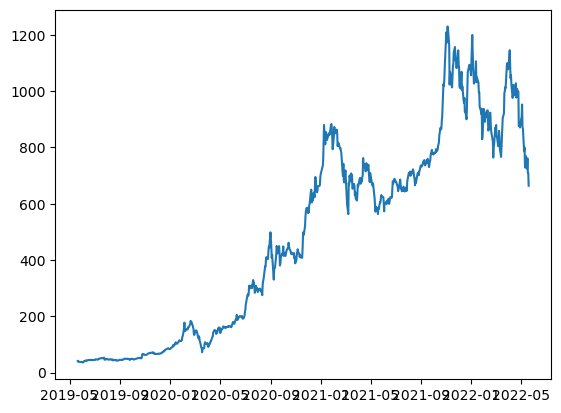

In [25]:
plt.plot(Stack_data.Close)

## Histogram Plot

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

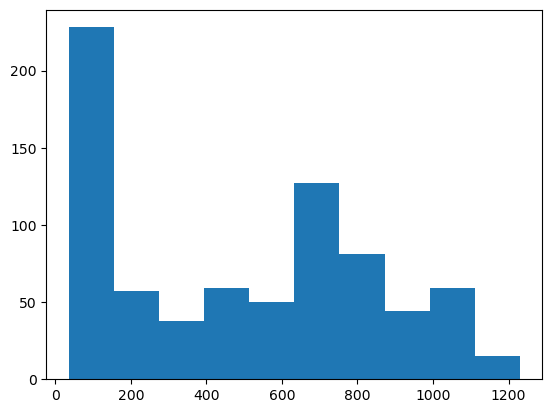

In [29]:
plt.hist(Stack_data.Close)

In [ ]:
### Distribution Plot

<Axes: xlabel='Close', ylabel='Density'>

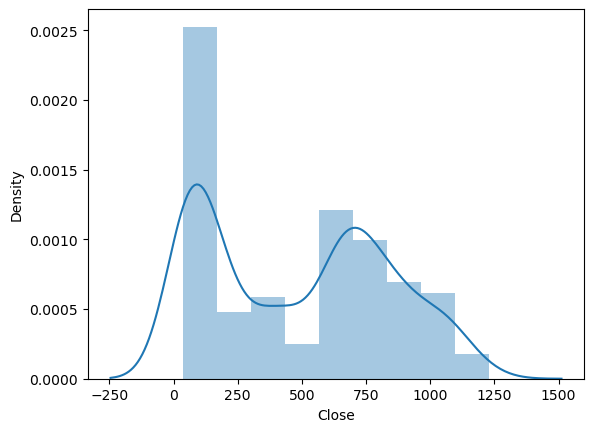

In [30]:
sns.distplot(Stack_data.Close)

From Above Graphs we can't clearly conclude about the Dataset .We Can't find clear Insights And Observation....

## Plotting CLear CLose Price Graph
1.Plot  
2.Histogram  
3.Distribution Plot  

### Plot

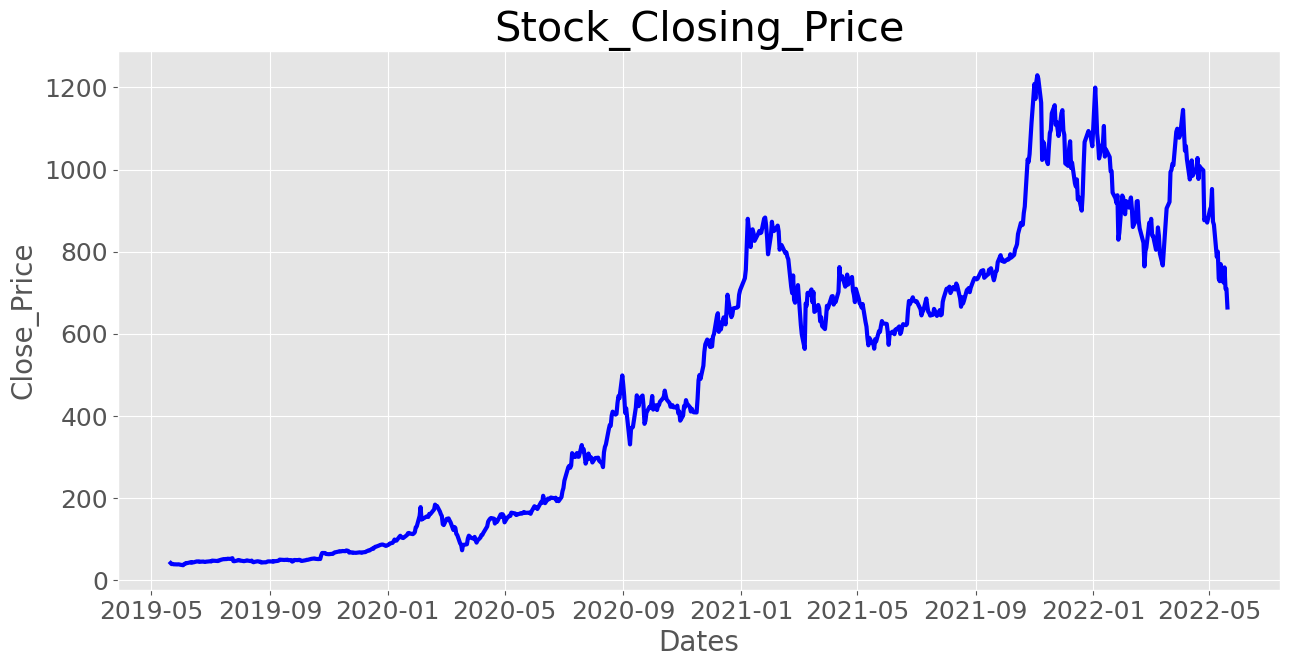

In [40]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=18)
plt.ylabel('Close_Price',fontsize=20)
plt.yticks(fontsize=18)
plt.plot(Stack_data['Close'],linewidth=3,color='blue')
plt.title('Stock_Closing_Price',fontsize=30)
plt.show()

## Histogram


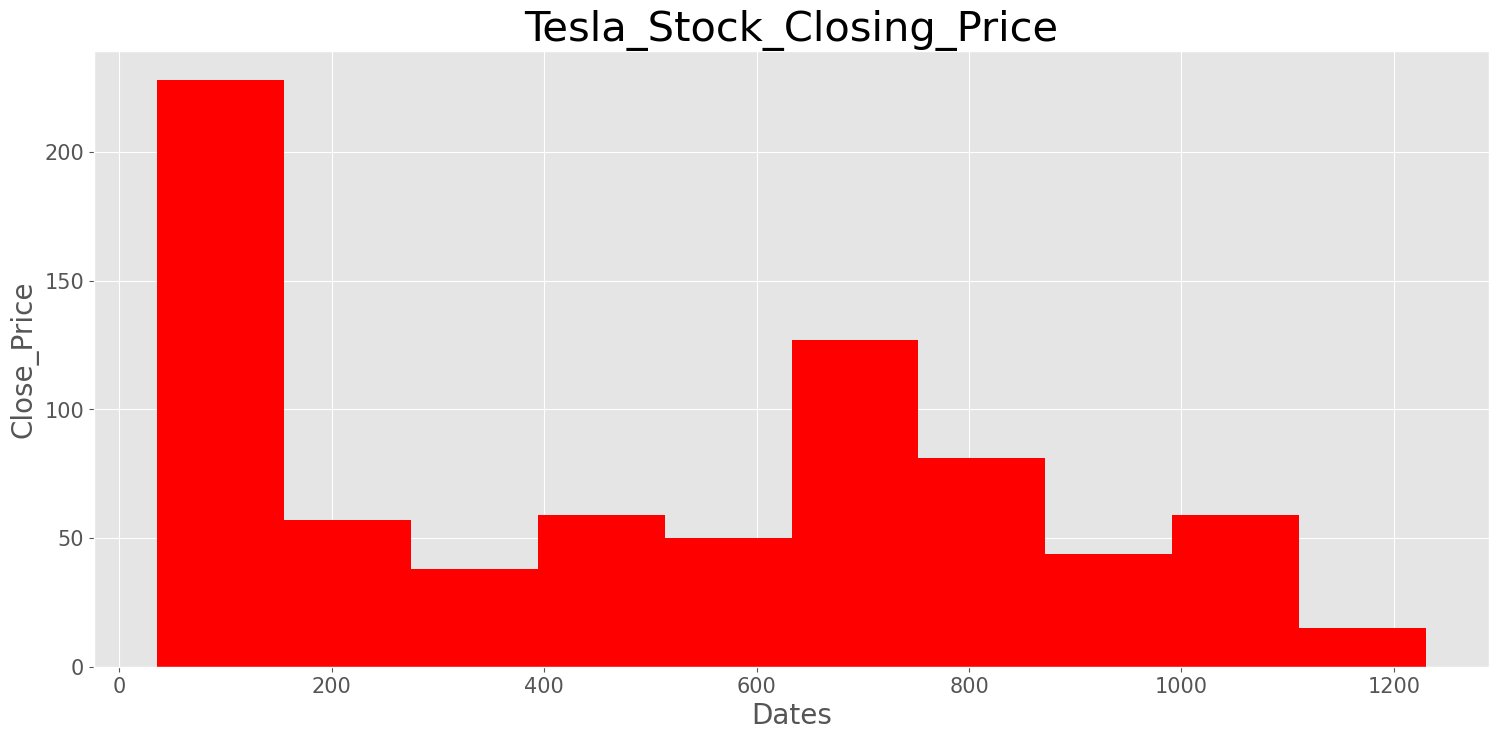

In [44]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close_Price',fontsize=20)
plt.yticks(fontsize=15)
plt.hist(Stack_data['Close'],linewidth=3,color='red')
plt.title('Tesla_Stock_Closing_Price',fontsize=30)
plt.show()


### Distribution Plot of Close Price

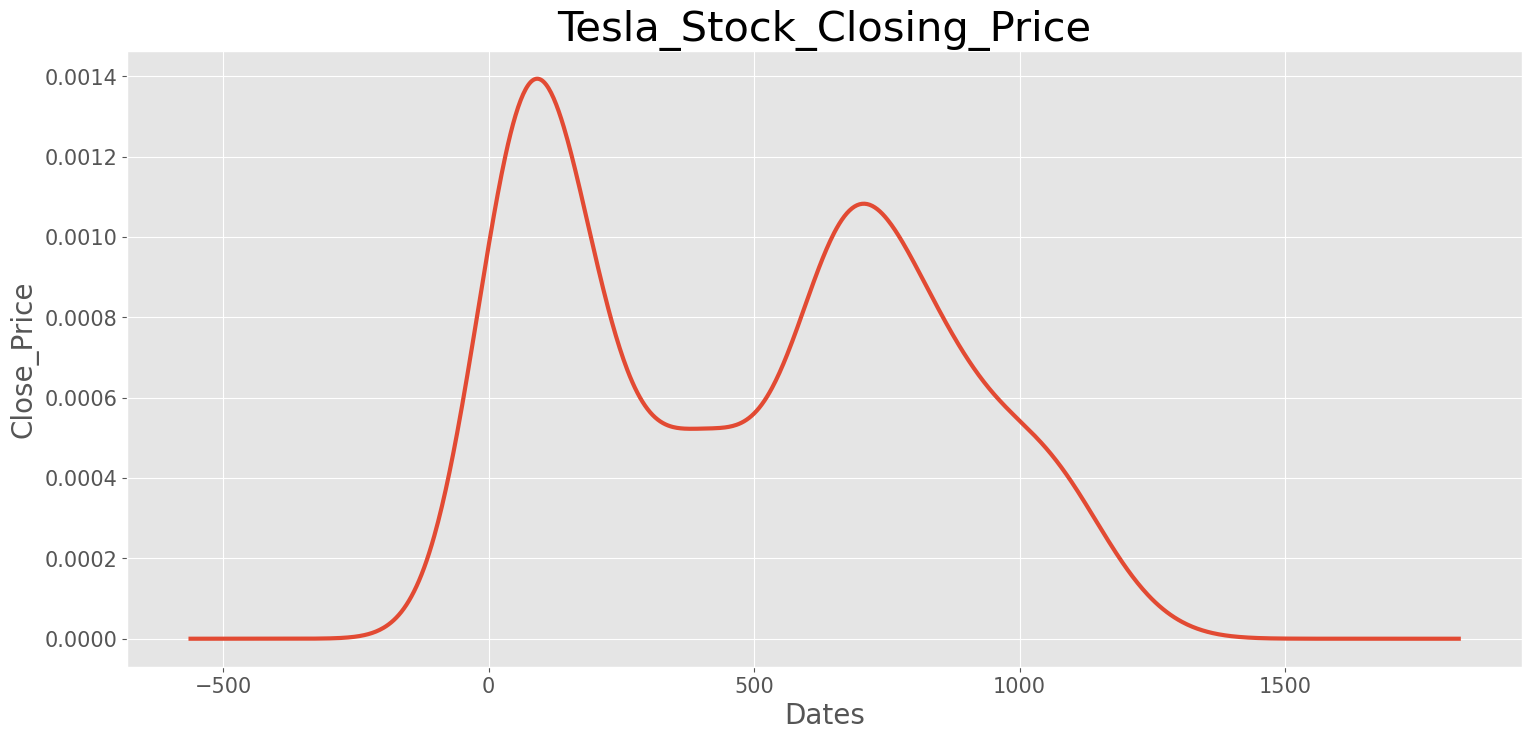

In [47]:
df_close=Stack_data['Close']
df_close.plot(kind='kde',figsize=(18,8),linewidth=3)
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close_Price',fontsize=20)
plt.yticks(fontsize=15)
plt.title('Tesla_Stock_Closing_Price',fontsize=30)
plt.show()


## Now Moving Average for Time_Series

In [69]:
rolmean=Stack_data['Close'].rolling(48).mean()

In [65]:
rolmean

Date
2019-05-21           NaN
2019-05-22     39.781000
2019-05-23     38.822001
2019-05-24     38.612000
2019-05-28     37.933001
                 ...    
2022-05-16    746.980011
2022-05-17    742.989990
2022-05-18    735.709991
2022-05-19    709.614990
2022-05-20    686.660004
Name: Close, Length: 758, dtype: float64

In [70]:
rolstd=Stack_data['Close'].rolling(48).std()

In [71]:
rolstd

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    113.126351
2022-05-17    115.404496
2022-05-18    119.124084
2022-05-19    121.840134
2022-05-20    125.615809
Name: Close, Length: 758, dtype: float64

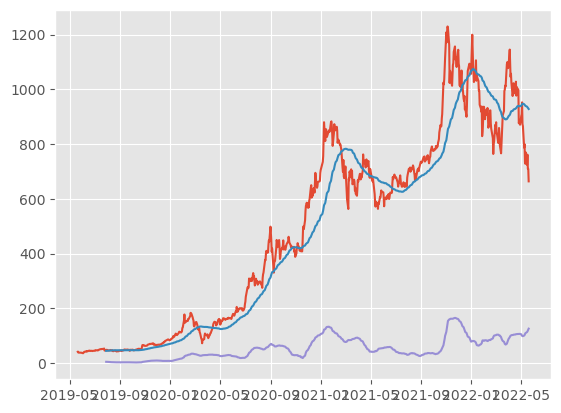

In [72]:
plt.plot(Stack_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

# Processing of the data

# Model building

# Model evalution